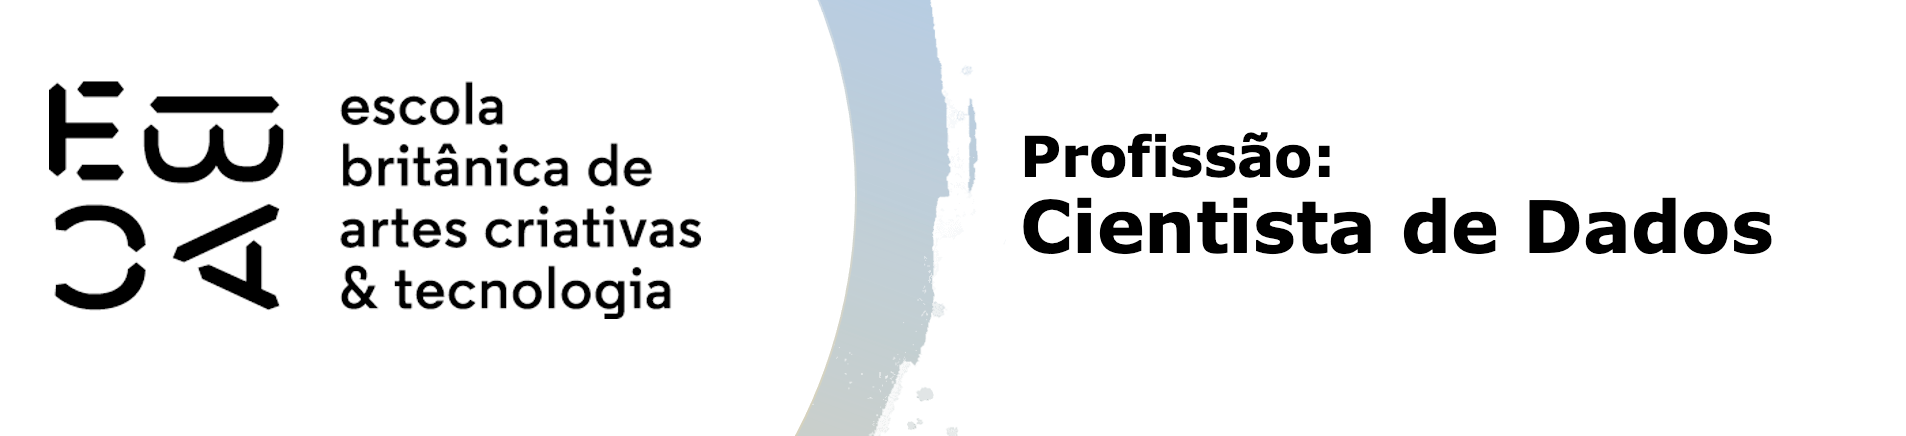

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:

df = pd.read_csv('./Dados/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
df.loc[df['tempo_emprego'].isna(), 'tempo_emprego'] = df['tempo_emprego'].mean()

In [4]:
df.reset_index(inplace=True)
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.drop(columns=['index', 'level_0'], inplace=True)

In [5]:
first_year = df['data_ref'].dt.year.min()
last_date = df['data_ref'].iat[-1]
is_test = df['data_ref'] >= last_date - pd.Timedelta(days=3*30)
df_test = df[is_test].copy()
df = df[~is_test]

In [6]:
df['log_renda'] = np.log(df['renda'])
df_test['log_renda'] = np.log(df_test['renda'])

In [7]:
reg = smf.ols('log_renda ~ tempo_emprego + idade + sexo + posse_de_imovel + tipo_renda + educacao', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 3.890e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        16:36:26   Log-Likelihood:            -7.9758e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599987   BIC:                         1.595e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.8851      0.013    620.341      0.000       7.860       7.910
sexo[T.M]                           0.1364      0.003     52.459      0.000       0.131       0.142
posse_de_imovel[T.S]                0.1837      0.003     72.330      0.000       0.179       0.189
tipo_renda[T.Bolsista]             -0.2233      0.052     -4.258      0.000      -0.326      -0.121
tipo_renda[T.Empresário]            0.1447      0.003     48.483      0.000       0.139       0.151
tipo_renda[T.Pensionista]          -0.2974      0.004    -70.122      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]      0.1324      0.004     30.089      0.000       0.124       0.141
educacao[T.Médio]                   0.0312      0.011      2.788      0.005       0.009       0.053
educacao[T.Pós graduação]           0.1551      0.038      4.069      0.000       0.080       0.230
educacao[T.Superior completo]       0.1243      0.011     10.999      0.000       0.102       0.146
educacao[T.Superior incompleto]     0.0456      0.013      3.601      0.000       0.021       0.070
tempo_emprego                       0.1289      0.000    620.339      0.000       0.129       0.129
idade                               0.0039      0.000     26.807      0.000       0.004       0.004
==============================================================================
Omnibus:                     1091.299   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.281
Skew:                          -0.053   Prob(JB):                    1.82e-209
Kurtosis:                       2.835   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [8]:
df_test['pred'] = reg.predict(df_test)
df_test['resid'] = df_test['log_renda'] - df_test['pred']

df['pred'] = reg.predict(df)
df['resid'] = df['log_renda'] - df['pred']

<Axes: ylabel='Count'>

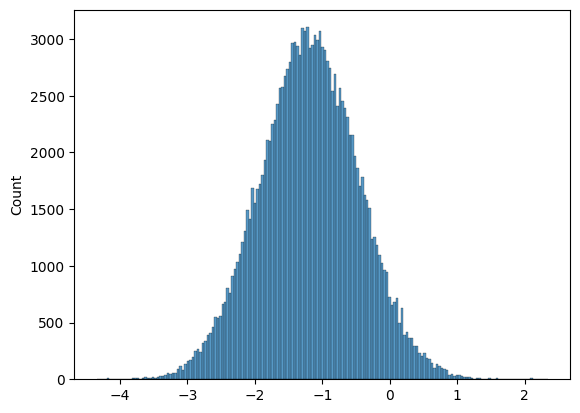

In [9]:
sns.histplot(df_test['log_renda'] - df_test['pred'])

In [10]:
(df_test['pred'] - df_test['log_renda']).mean()

1.1895882777720819

<Axes: xlabel='pred', ylabel='log_renda'>

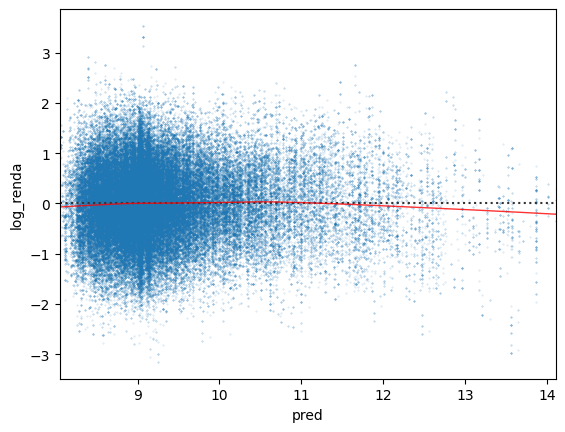

In [11]:
sns.residplot(
    data=df_test,
    x='pred',
    y='log_renda',
    lowess=True,
    scatter_kws={'alpha': 0.25, 's':.1},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

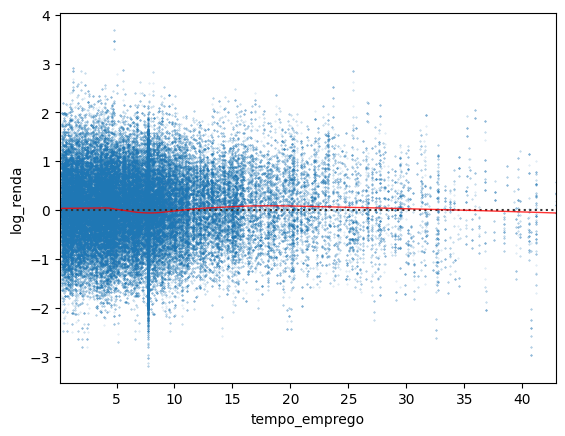

In [12]:
sns.residplot(
    data=df_test,
    x='tempo_emprego',
    y='log_renda',
    lowess=True,
    scatter_kws={'alpha': 0.25, 's':.1},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

<Axes: xlabel='idade', ylabel='log_renda'>

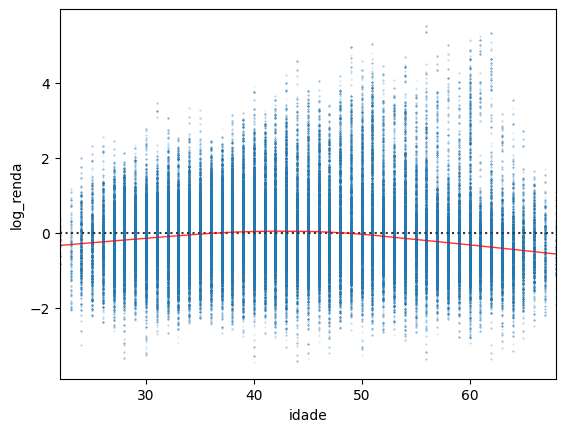

In [13]:
sns.residplot(
    data=df_test,
    x='idade',
    y='log_renda',
    lowess=True,
    scatter_kws={'alpha': 0.25, 's':.1},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

<Axes: xlabel='sexo', ylabel='resid'>

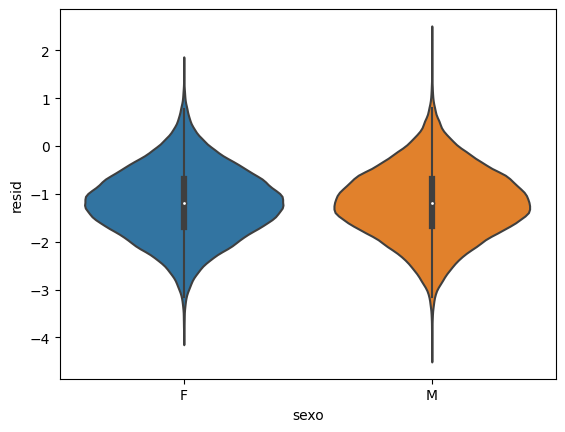

In [14]:
sns.violinplot(
    data=df_test,
    x='sexo',
    y='resid'
)

<Axes: xlabel='posse_de_imovel', ylabel='resid'>

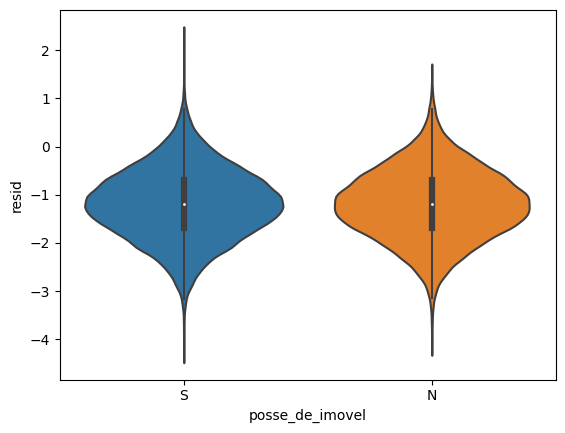

In [15]:
sns.violinplot(
    data=df_test,
    x='posse_de_imovel',
    y='resid'
)

<Axes: xlabel='tipo_renda', ylabel='resid'>

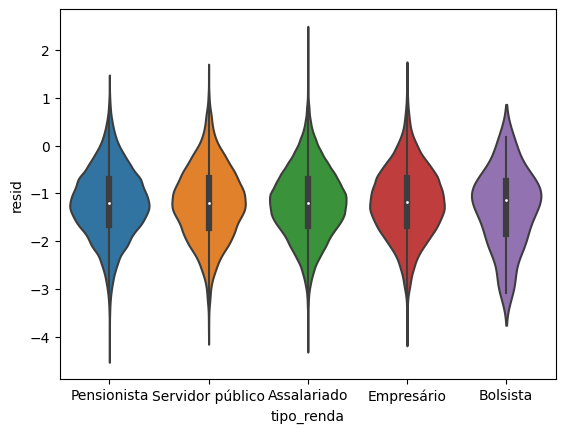

In [16]:
sns.violinplot(
    data=df_test,
    x='tipo_renda',
    y='resid'
)

<Axes: xlabel='educacao', ylabel='resid'>

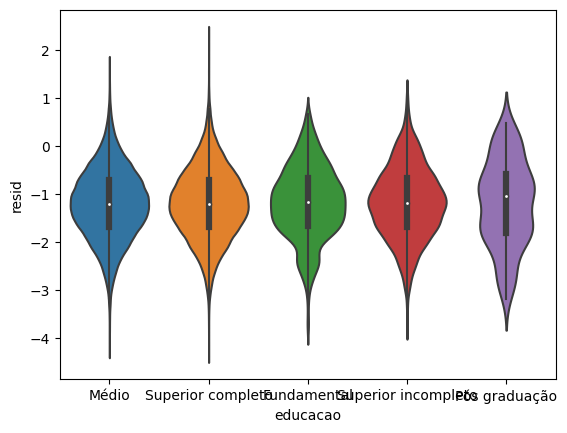

In [17]:
sns.violinplot(
    data=df_test,
    x='educacao',
    y='resid'
)

In [18]:
df_test['mes'] = df_test['data_ref'].dt.month + (df_test['data_ref'].dt.year - first_year) * 12
df['mes'] = df['data_ref'].dt.month + (df['data_ref'].dt.year - first_year) * 12

<Axes: xlabel='mes', ylabel='resid'>

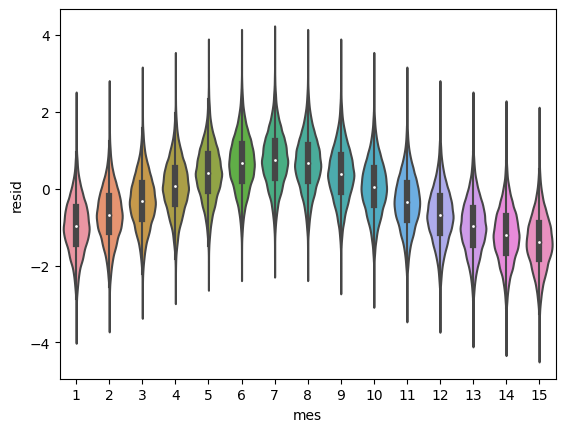

In [21]:
sns.violinplot(
    data=pd.concat((df, df_test)),
    x='mes',
    y='resid'
)

Como podemos ver, os resíduos possuem distribuição normal. Todavia, há uma relação de dependência com relação ao mês de referência. Isso explica o viés do erro na base de testes!

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [22]:
st_res = reg.outlier_test().student_resid

KeyboardInterrupt: 

In [1]:
#df['st_res'] = reg.outlier_test(df).student_resid
#df_test['st_res'] = reg.outlier_test(df_test).student_resid

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [ ]:
df = pd.concat((df, df_test))
df, df_test = train_test_split(df, test_size=.2, shuffle=True)